# Libraries

In [1]:
!pip install simpledbf
from google.colab import drive
from scipy.interpolate import interp2d
from simpledbf import Dbf5
import pandas as pd
import datetime
import time
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.interpolate import pchip_interpolate



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for simpledbf: filename=simpledbf-0.2.6-py3-none-any.whl size=13801 sha256=1c4507b56a6aa55ca5e2344370bb489161f087ab4fe03d33792b298fe67e02ac
  Stored in directory: /root/.cache/pip/wheels/7c/4a/85/8d25e6dc4d2968a93a5459ed0153fd6f67041cfece137ca9ce
Successfully built simpledbf


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Open the dataframe

In [3]:
# start the time
startTime = time.time()


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Agrimonia/Bovini/Bovini.dbf'
df = Dbf5(path).to_dataframe()
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%Y')
df.rename(columns = {'DATE':'Date'}, inplace = True)
print(type(df))

#Calculate the density
operation = df['NUMEROCAPI']/(df['Shape_Area'])
df['NUMEROCAPI'] = operation*pow(10,6)
df = df.loc[(df['COD_REG'] == 1) | (df['COD_REG'] == 3)|(df['COD_REG'] == 4) | (df['COD_REG'] == 5) |(df['COD_REG'] == 8)]


df.rename(columns = {'NUMEROCAPI':'DENSITY',}, inplace = True)

df.head()

<class 'pandas.core.frame.DataFrame'>


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,CenterX,CenterY,TYPEINT,DENSITY,NALLEVAMENT,BOVINI,BUFALINI,Date
0,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,5.157161,9,62,0,2015-12-31
1,1,1,1,201,201,1079,001079,Chiesanuova,NaN,0,4.118911e+06,10777.318814,394197.394664,5.030811e+06,0,66.036874,7,272,0,2015-12-31
2,1,1,1,201,201,1089,001089,Coazze,NaN,0,5.657268e+07,41591.122092,360808.802237,4.990104e+06,0,1.484816,5,84,0,2015-12-31
3,1,1,1,201,201,1006,001006,Almese,NaN,0,1.787564e+07,17058.439037,375721.501086,4.997294e+06,0,12.642906,21,226,0,2015-12-31
4,1,1,1,201,201,1007,001007,Alpette,NaN,0,5.626076e+06,9795.562269,388609.910901,5.029096e+06,0,0.000000,0,0,0,2015-12-31


In [5]:
#count rows
count = df.shape
print(count)

(50206, 20)


# Extract informations

In [6]:
temp = df.loc[:,['PRO_COM']]
print(temp.size)
temp.head()

50206


,PRO_COM
0,1077
1,1079
2,1089
3,1006
4,1007


In [7]:
list = temp.PRO_COM.unique()
count_unique = df['PRO_COM'].nunique()  

print(list)
print(type(list))
print("Number of unique cities: ",count_unique)

[ 1077  1079  1089 ... 15251 22254 97008]
<class 'numpy.ndarray'>
Number of unique cities:  3862


# Select the values

In [8]:
table_to_examine = df.loc[df['PRO_COM'] == 1077]
print(table_to_examine.shape)
table_to_examine.head()


(13, 20)


,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,CenterX,CenterY,TYPEINT,DENSITY,NALLEVAMENT,BOVINI,BUFALINI,Date
0,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,5.157161,9,62,0,2015-12-31
7904,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,4.990801,8,60,0,2016-06-30
15808,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,5.489881,8,66,0,2016-12-31
23712,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,5.073981,8,61,0,2017-06-30
31616,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,4.824441,8,58,0,2017-12-31


In [9]:
#Extract the single line
line = table_to_examine.loc[0:1,'COD_RIP':'TYPEINT']
line.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,CenterX,CenterY,TYPEINT
0,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0


## Functions

### Missing rows

In [10]:

def fill_missing_rows(df, column, fillwith):
    '''
    Fills the rows of a specific column with a provided list of values.
    Parameters:
        df       (DataFrame)  : The DataFrame to be filled
        column      (string)  : The target column
        fillwith      (list)  : The list of values to fill the column with
    
    Returns:
        df       (DataFrame)  : The filled DataFrame
    '''
    df = df.set_index(column).reindex(pd.Index(fillwith))

    df.reset_index(inplace=True)

    df = df.rename(columns={'index': column})

    return df

### Mising dates

In [11]:
def fill_missing_dates(df, start, end, freq='d', column='Date'):    
    '''
    Fills the rows of a specific column with the dates between start and end and with a given frequency.
    Parameters:
        df      (DataFrame) : The DataFrame to be filled
        column     (string) : The target column
        start      (string) : The time interval start date
        end        (string) : The time interval end date
        freq       (string) : The frequency of the date ranging
    
    Returns:
        df      (DataFrame) : The filled DataFrame 
    '''
    index = pd.Index(pd.date_range(start, end, freq=freq))

    if len(df) < len(index):

        df[column] = pd.to_datetime(df[column])

        df = fill_missing_rows(df, column, index)

        assert(len(df) == len(index))

    return df

### Interpolation

In [12]:
def upsample(df, column, start, end, fillna=False):
    '''
    Upsamples the time series by augmenting the DataFrame with the missing dates and interpolating them.
    Parameters:
        df    (DataFrame) : The DataFrame containing the time series to be upsampled
        column   (string) : The column name of the DataFrame where the time series is located
        start    (string) : The time interval start date
        end      (string) : The time interval end date
        fillna  (boolean) : If True fills the remaining missing values
    Returns:
        filled_df (DataFrame) : The DataFrame with the upsampled time series at the specified column
    '''
    filled_df = fill_missing_dates(df, start, end, freq='d', column='Date')
    filled_df[column] = filled_df[column].interpolate()

    if fillna: filled_df[column] = filled_df[column].fillna(method='ffill').fillna(method='bfill')

    return filled_df


### Interpolate chip

In [13]:
def interpolatepchip(table_to_examine):
  result = fill_missing_dates(table_to_examine, '2015-12-31', '2021-12-31')
  allDates = result['Date']
  y = pchip_interpolate(table_to_examine['Date'], table_to_examine['DENSITY'], allDates)
  template = table_to_examine.iloc[0:1,0:15]
  n = result.shape[0]
  df_repeated = pd.concat([template]*n, ignore_index=True)
  df_repeated['Date'] = allDates 
  df_repeated['Density'] = y 
  return df_repeated

## Call functions

In [14]:
dfresult = interpolatepchip(table_to_examine)
print(type(dfresult))
print(dfresult.shape)

dfresult

<ipython-input-11-d8c1033fdc5d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_datetime(df[column])


<class 'pandas.core.frame.DataFrame'>
(2193, 17)


,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,CenterX,CenterY,TYPEINT,Date,Density
0,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,2015-12-31,5.157161
1,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,2016-01-01,5.154458
2,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,2016-01-02,5.151785
3,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,2016-01-03,5.149141
4,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,2016-01-04,5.146526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,2021-12-27,5.323521
2189,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,2021-12-28,5.323521
2190,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,2021-12-29,5.323521
2191,1,1,1,201,201,1077,001077,Chiaverano,NaN,0,1.202212e+07,18164.236621,414253.041314,5.039521e+06,0,2021-12-30,5.323521


# Print the result

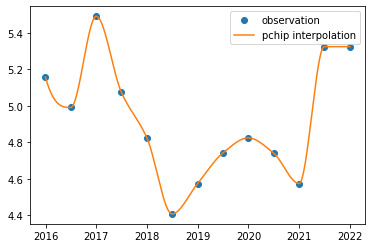

In [15]:
plt.plot(table_to_examine['Date'], table_to_examine['DENSITY'], "o", label="observation")
plt.plot(dfresult['Date'], dfresult['Density'], label="pchip interpolation")
plt.legend()
plt.show()

# Measure time 

In [16]:

executionTime = (time.time() - startTime)/60
print('Execution time in minutes: ' + str(executionTime))

Execution time in minutes: 0.08935916423797607
